<a href="https://colab.research.google.com/github/stutis28/MachineLearningBasics/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

In [0]:
#Cost Function
def cost_function(m, b, x, y):
  total_error = 0
  for i in range(0, len(x)):
    total_error += (y[i] - (m*x[i]+b))**2
  return total_error / float(len(x))


In [0]:
#https://medium.com/@montjoile/an-introduction-to-gradient-descent-algorithm-34cf3cee752b
#https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e
#Gradient Descent Algorithm
def gradient_descent(m, b, x, y, learning_rate, number_of_iterations):
  N = float(len(x))
  for j in range(number_of_iterations):
    b_gradient = 0
    m_gradient = 0 
    for i in range(0, len(x)):
      b_gradient += -(2/N) * (y[i] - (m*x[i]+b))
      m_gradient +=   -(2/N) *  x[i] * (y[i] - (m * x[i] + b))
    b -= (learning_rate * b_gradient)
    m -= (learning_rate * m_gradient)
    # get error for every 100 iterations
    if j%100 == 0:
      print("MSE after " +str(j) + "iteration: " +str(cost_function(m,b,x,y)))
  return [b, m]  



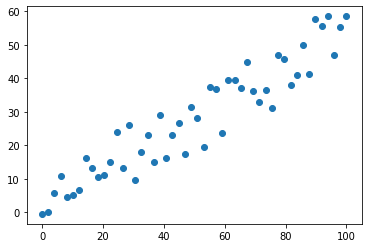

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,100,50)
delta = np.random.uniform(-10,10,x.size)
y = 0.5*x + 3 + delta

plt.scatter(x,y)

In [0]:
  learning_rate = 0.0001

  initial_b = 0
  initial_m = 0

  num_iterations = 1000

  print('Initial MSE: ' ,cost_function(initial_m, initial_b,x,y))
  [b,m] = gradient_descent(initial_m, initial_b, x, y, learning_rate, num_iterations)
  print('b: ',b)
  print('m: ',m)
  print('MSE: ', cost_function(m,b,x,y))

Initial MSE:  1065.2901551315576
MSE after 0iteration: 140.98629501044184
MSE after 100iteration: 30.775734696155137
MSE after 200iteration: 30.766178656394505
MSE after 300iteration: 30.756720548367277
MSE after 400iteration: 30.747359368454287
MSE after 500iteration: 30.738094123321666
MSE after 600iteration: 30.72892382981533
MSE after 700iteration: 30.71984751485672
MSE after 800iteration: 30.710864215339566
MSE after 900iteration: 30.701972978027612
b:  0.10424347678202639
m:  0.552723205816588
MSE:  30.693260412675592


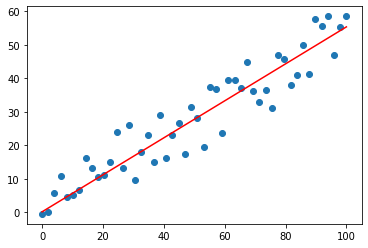

In [0]:
predictions = [ (m * x[i]) + b for i in range(len(x))]
plt.scatter(x,y)

plt.plot(x, predictions, color = 'r')

SK Learn For LINEAR REGRESSION

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression

print(x.shape)
x = x.reshape((-1,1))
print(x.shape)

(50,)
(50, 1)


In [0]:
model = LinearRegression()

model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('Y Intercept: ', model.intercept_)
print('Gradient: ', model.coef_)

Y Intercept:  1.92082355870701
Gradient:  [0.52574768]


In [0]:
y_pred = model.predict(x)

In [0]:
y_pred

array([ 1.92082356,  2.99377801,  4.06673246,  5.13968691,  6.21264136,
        7.28559581,  8.35855027,  9.43150472, 10.50445917, 11.57741362,
       12.65036807, 13.72332252, 14.79627697, 15.86923142, 16.94218587,
       18.01514032, 19.08809478, 20.16104923, 21.23400368, 22.30695813,
       23.37991258, 24.45286703, 25.52582148, 26.59877593, 27.67173038,
       28.74468484, 29.81763929, 30.89059374, 31.96354819, 33.03650264,
       34.10945709, 35.18241154, 36.25536599, 37.32832044, 38.4012749 ,
       39.47422935, 40.5471838 , 41.62013825, 42.6930927 , 43.76604715,
       44.8390016 , 45.91195605, 46.9849105 , 48.05786496, 49.13081941,
       50.20377386, 51.27672831, 52.34968276, 53.42263721, 54.49559166])

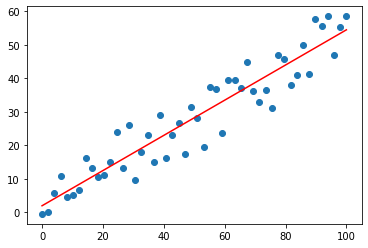

In [0]:
plt.scatter(x,y)
plt.plot(x, y_pred, color='r')

In [0]:
from sklearn.metrics import mean_squared_error

print("MSE: ", mean_squared_error(y,y_pred))

MSE:  29.843269878666124


Linear Regression to predict 100m Olympic Race time for year 2020

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/olympic100m.csv"
df = pd.read_csv(file_name)
df.head(40)

,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


In [0]:
x = df['year']
x_train = np.array(x).reshape((-1,1))
x_train.shape

(29, 1)

In [0]:
y_train = np.array(df['time'])
y_train.shape

(29,)

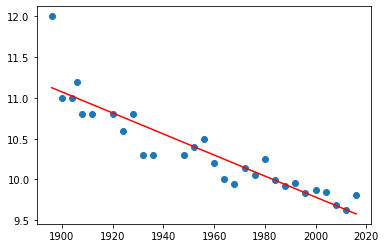

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
plt.scatter(x_train,y_train)
plt.plot(x,y_pred, color ='r')

In [0]:
x_2020 = np.array([2020]).reshape((-1,1))
x_2020.shape

(1, 1)

In [0]:
model.predict(x_2020)

array([9.52679525])

In [0]:
y_pred

array([11.12455601, 11.07301534, 11.02147467, 10.99570434, 10.969934  ,
       10.91839333, 10.81531199, 10.76377132, 10.71223065, 10.66068998,
       10.60914931, 10.45452731, 10.40298664, 10.35144597, 10.2999053 ,
       10.24836463, 10.19682396, 10.14528329, 10.09374262, 10.04220195,
        9.99066128,  9.93912061,  9.88757994,  9.83603927,  9.7844986 ,
        9.73295793,  9.68141726,  9.62987659,  9.57833592])

In [0]:
x_1906 = np.array([1906]).reshape((-1,1))
model.predict(x_1906)

array([10.99570434])

Polynomial Regressions

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/polylinearregression.csv"
poly = pd.read_csv(file_name)
poly.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [0]:
x = poly.iloc[:,1:2].values
y = poly.iloc[:,2].values

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model_instantiate = PolynomialFeatures(degree = 9)
model_poly = model_instantiate.fit_transform(x)

lin_poly = LinearRegression()
lin_poly.fit(model_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

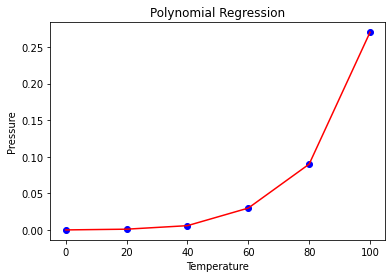

In [35]:
plt.scatter(x,y, color = 'blue')
plt.plot(x, lin_poly.predict(model_poly),color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

Multivariate Linear Regression

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_name3 = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/auto-mpg.csv"
auto_df = pd.read_csv(file_name3)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [47]:
auto_df.loc[~auto_df['horsepower'].astype(str).str.isdigit(), 'horsepower'].tolist()

['?', '?', '?', '?', '?', '?']

In [51]:
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [0]:
indexNames = auto_df[auto_df['horsepower'] == '?'].index

In [0]:
auto_df.drop(indexNames, inplace = True)

In [55]:
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [0]:
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

In [59]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [0]:
x = auto_df.iloc[:,1:8].values
y = auto_df.iloc[:,0].values

In [61]:
x.shape

(392, 7)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Trial_Data = np.array([8, 220, 195, 3042 , 6.7, 98, 3])
Trial_Data = Trial_Data.reshape((-1, 7))
Trial_Data = Trial_Data.astype(float)

In [64]:
regressor.predict(Trial_Data)[0]

37.86321409762151